# Emotion Recognition

DESCRIPTION

Future customizations, such as understanding human emotions, could lead to a range of advancements, such as determining whether a person likes a specific statement, item or product, food, or how they are feeling in a particular circumstance, and so on. 

 

Objective:

To build a model using a convolutional neural network that can classify a person's emotion

Dataset description:

The dataset contains two folders named Train and Test. These folders have approximately 35,000 images of seven different human emotions, such as anger, disgust, fear, happiness, neutral, sadness, and surprise.

 

Train folder: This folder has images for training the model, which is divided into subfolders having the same name as the class. 

Test folder: This folder has images for testing the model, which is divided into subfolders having the same name as the class.

In [88]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import *

import os
from glob import glob

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten,Activation
from tensorflow.keras.activations import relu, softmax, tanh
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping

In [69]:
training_path = 'C:/Users/SAURSHIN/Downloads/archive/images/train/'
testing_path = 'C:/Users/SAURSHIN/Downloads/archive/images/validation/'

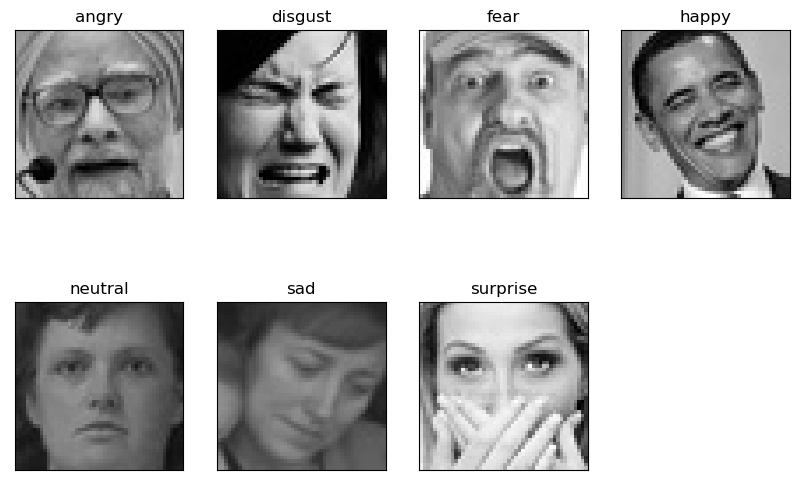

In [70]:
plt.figure(figsize=(10, 10))
expression = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for i in range(len(expression)):
    plt.subplot(3,4,i+1)
    img = load_img(training_path + '/'+ expression[i] + '/'+ os.listdir(training_path + '/'+ expression[i])[1], target_size=(48,48))
    plt.imshow(img)
    plt.title(expression[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [71]:
train_dict = {'label': list(i for i in os.listdir(training_path)), 
              'counts' : list(len(os.listdir(training_path+i)) for i in os.listdir(training_path))}
train_count = pd.DataFrame(train_dict)
train_count

,label,counts
0,angry,3993
1,disgust,436
2,fear,4103
3,happy,7164
4,neutral,4982
5,sad,4938
6,surprise,3205


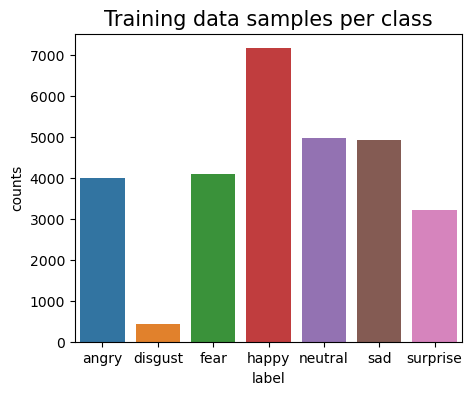

In [72]:
plt.figure(figsize=(5,4))
sns.barplot(train_count['label'], train_count['counts'])
plt.title('Training data samples per class', size=15)
plt.show()

In [73]:
test_dict = {'label': list(i for i in os.listdir(testing_path)), 
              'counts' : list(len(os.listdir(testing_path+i)) for i in os.listdir(testing_path))}
test_count = pd.DataFrame(test_dict)
test_count

,label,counts
0,angry,960
1,disgust,111
2,fear,1018
3,happy,1825
4,neutral,1216
5,sad,1139
6,surprise,797


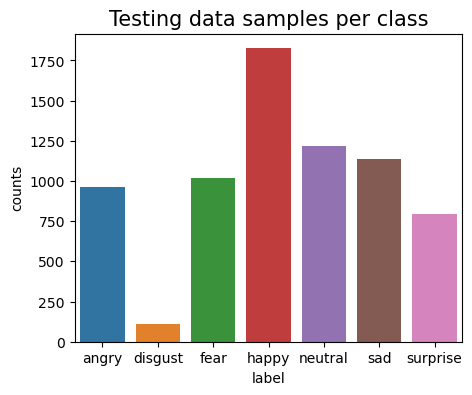

In [74]:
plt.figure(figsize=(5,4))
sns.barplot(test_count['label'], test_count['counts'])
plt.title('Testing data samples per class', size=15)
plt.show()

In [75]:
generator = ImageDataGenerator()

In [76]:
training_data = generator.flow_from_directory(training_path,
                                              target_size=(45, 45), 
                                              batch_size=128, 
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              shuffle=True)

Found 28821 images belonging to 7 classes.


In [77]:
testing_data = generator.flow_from_directory(testing_path, 
                                             target_size=(45,45),
                                             color_mode='grayscale', 
                                             batch_size=128, 
                                             class_mode='categorical', 
                                             shuffle=False)

Found 7066 images belonging to 7 classes.


In [36]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(48,48,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [91]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'] )
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [92]:
es = EarlyStopping()

In [ ]:
history = model.fit(training_data, epochs=50, batch_size=128, validation_data=testing_data)

Epoch 1/50
226/226 [==============================] - 418s 2s/step - loss: 2.2612 - accuracy: 0.2453 - val_loss: 1.7258 - val_accuracy: 0.3579
Epoch 2/50
226/226 [==============================] - 441s 2s/step - loss: 1.8955 - accuracy: 0.3293 - val_loss: 1.6125 - val_accuracy: 0.3995
Epoch 3/50
226/226 [==============================] - 424s 2s/step - loss: 1.7335 - accuracy: 0.3866 - val_loss: 1.4985 - val_accuracy: 0.4391
Epoch 4/50
226/226 [==============================] - 419s 2s/step - loss: 1.6340 - accuracy: 0.4125 - val_loss: 1.4561 - val_accuracy: 0.4587
Epoch 5/50
226/226 [==============================] - 428s 2s/step - loss: 1.5593 - accuracy: 0.4399 - val_loss: 1.4047 - val_accuracy: 0.4892
Epoch 6/50
226/226 [==============================] - 428s 2s/step - loss: 1.4791 - accuracy: 0.4636 - val_loss: 1.3761 - val_accuracy: 0.4948
Epoch 7/50
226/226 [==============================] - 420s 2s/step - loss: 1.4215 - accuracy: 0.4834 - val_loss: 1.3346 - val_accuracy: 0.5100

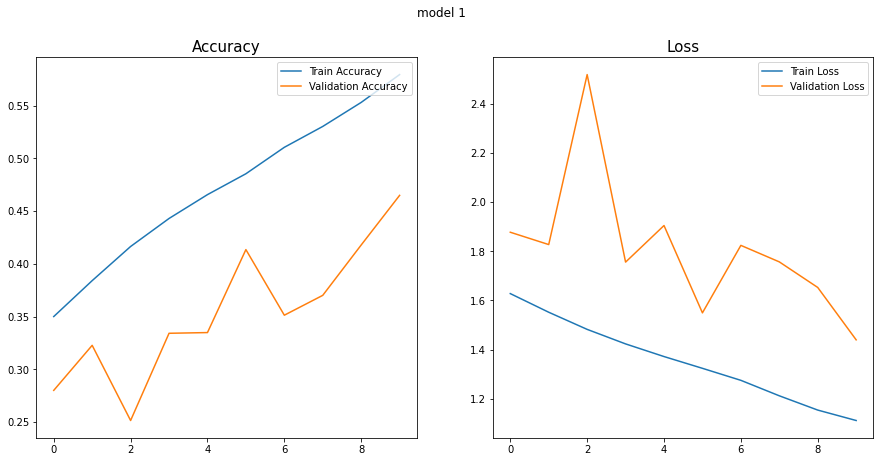

In [132]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy', size=15)
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss', size=15)
plt.legend(loc = 'upper right')
plt.suptitle('model 1')
plt.show()

In [228]:
model.evaluate(testing_data)

24/24 [==============================] - 48s 2s/step - loss: 1.4400 - accuracy: 0.4649


[1.4399911165237427, 0.46487393975257874]

In [84]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [118]:
preds = model.predict(testing_data)

51/56 [==========================>...] - ETA: 4s

KeyboardInterrupt: 

In [36]:
testing_data.labels.shape

(2975,)

In [38]:
training_data.labels.shape

(11369,)

In [ ]:
final_preds = [np.argmax(i) for i in preds]

In [ ]:
labels = testing_data.class_indices.keys()

In [ ]:
print(classification_report(testing_data.labels, final_preds, target_names=labels))

In [ ]:
print(confusion_matrix(testing_data.labels, final_preds))

In [104]:
model.save('model_1.h5')

# Model 2

In [60]:
model2 = Sequential()
model2.add(Conv2D(128,(3,3),input_shape=(45,45,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.20))
model2.add(BatchNormalization())

model2.add(Conv2D(256,(5,5)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.20))
model2.add(BatchNormalization())

model2.add(Flatten())

In [61]:
model2.add(Dense(128, activation='elu'))
model2.add(BatchNormalization())

model2.add(Dense(512, activation='elu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.20))

model2.add(Dense(7, activation='softmax'))

In [62]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 43, 43, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 21, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 21, 21, 128)       0         
                                                                 
 batch_normalization_5 (Batc  (None, 21, 21, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 256)       819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 256)       

In [260]:
model2.compile(optimizer='rmsprop', loss=categorical_crossentropy, metrics=['accuracy'] )

In [261]:
es = EarlyStopping(patience=2)

In [262]:
model2.fit(training_data, validation_data=testing_data, epochs=10, callbacks=es)

Epoch 1/10
89/89 [==============================] - 198s 2s/step - loss: 2.0865 - accuracy: 0.2653 - val_loss: 2.4712 - val_accuracy: 0.2635
Epoch 2/10
89/89 [==============================] - 203s 2s/step - loss: 1.7231 - accuracy: 0.3514 - val_loss: 1.8660 - val_accuracy: 0.3657
Epoch 3/10
89/89 [==============================] - 205s 2s/step - loss: 1.5297 - accuracy: 0.4262 - val_loss: 1.7866 - val_accuracy: 0.3939
Epoch 4/10
89/89 [==============================] - 206s 2s/step - loss: 1.3587 - accuracy: 0.4899 - val_loss: 1.6124 - val_accuracy: 0.4457
Epoch 5/10
89/89 [==============================] - 205s 2s/step - loss: 1.1619 - accuracy: 0.5688 - val_loss: 1.6423 - val_accuracy: 0.4477
Epoch 6/10
89/89 [==============================] - 206s 2s/step - loss: 0.9475 - accuracy: 0.6520 - val_loss: 1.7360 - val_accuracy: 0.4491


In [263]:
model2.save('model2.h5')

In [115]:
model2 = tf.keras.models.load_model('model2.h5')

AttributeError: 'NoneType' object has no attribute 'history'

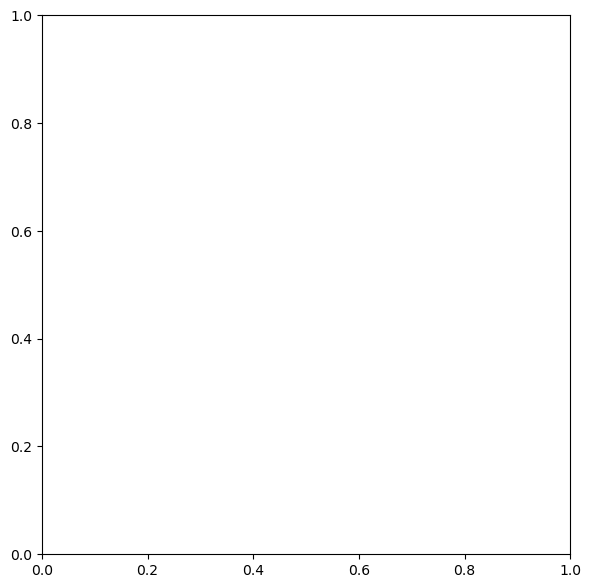

In [116]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(model2.history.history['loss'], label='Training loss')
plt.plot(model2.history.history['val_loss'], label='Validation loss')
plt.title('Loss', size=20)
plt.legend()

plt.subplot(1,2,2)
plt.plot(model2.history.history['accuracy'], label='Training accuracy')
plt.plot(model2.history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy', size=20)
plt.legend()

plt.suptitle('model 2')

plt.show()

In [80]:
model2.evaluate(testing_data)

56/56 [==============================] - 15s 254ms/step - loss: 1.6552 - accuracy: 0.4624


[1.6551673412322998, 0.4623549282550812]

In [81]:
preds2 = model2.predict(testing_data)
final_preds2 = [np.argmax(i) for i in preds2]

56/56 [==============================] - 13s 234ms/step


In [82]:
print(classification_report(testing_data.labels, final_preds2, target_names=labels))

              precision    recall  f1-score   support

       angry       0.36      0.41      0.38       960
     disgust       0.41      0.39      0.40       111
        fear       0.33      0.36      0.34      1018
       happy       0.67      0.68      0.68      1825
     neutral       0.50      0.31      0.38      1216
         sad       0.31      0.47      0.37      1139
    surprise       0.72      0.40      0.51       797

    accuracy                           0.46      7066
   macro avg       0.47      0.43      0.44      7066
weighted avg       0.49      0.46      0.47      7066



In [119]:
print(confusion_matrix(testing_data.labels, final_preds2))

[[ 394   15  111  117   66  245   12]
 [  26   43   13   10    6   12    1]
 [ 165   11  362  102   72  256   50]
 [ 137   10   92 1244   81  237   24]
 [ 163   11  118  160  373  373   18]
 [ 159   10  158  146  116  533   17]
 [  45    6  255   76   27   70  318]]


<AxesSubplot:>

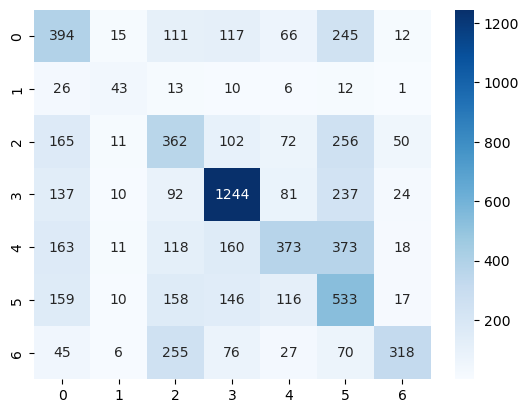

In [114]:
cm=confusion_matrix(testing_data.labels, final_preds2)
sns.heatmap(cm,annot=True, fmt='', cmap='Blues')

# Transfer Learning

## 1 : Densenet

In [3]:
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions

In [4]:
generator2 = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [6]:
train_data2 = generator2.flow_from_directory(training_path, target_size=[45,45], class_mode='categorical', batch_size=128)

Found 11369 images belonging to 7 classes.


In [7]:
test_data2 = generator2.flow_from_directory(testing_path, target_size=[45,45], class_mode='categorical', batch_size=128)

Found 2975 images belonging to 7 classes.


In [8]:
train_data2.image_shape

(45, 45, 3)

In [9]:
test_data2.image_shape

(45, 45, 3)

In [10]:
model3 = DenseNet121(include_top=False, input_shape=[45,45,3], weights='imagenet')

29084464/29084464 [==============================] - 16s 1us/step


In [13]:
for layers in model3.layers:
    layers.trainable=False

In [14]:
model3 = Sequential(model3)

In [15]:
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.25))

model3.add(Dense(7, activation='softmax'))

In [16]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 7,301,703
Trainable params: 264,199
Non-trainable params: 7,037,504
_________________________________________________________________


In [17]:
model3.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [18]:
es = EarlyStopping(patience=2)

In [19]:
model3.fit(train_data2, validation_data=test_data2, callbacks=es, epochs=15)

Epoch 1/15
89/89 [==============================] - 82s 849ms/step - loss: 1.7833 - accuracy: 0.2925 - val_loss: 1.6534 - val_accuracy: 0.3751
Epoch 2/15
89/89 [==============================] - 66s 738ms/step - loss: 1.5986 - accuracy: 0.3663 - val_loss: 1.6395 - val_accuracy: 0.3751
Epoch 3/15
89/89 [==============================] - 68s 761ms/step - loss: 1.5413 - accuracy: 0.3922 - val_loss: 1.6278 - val_accuracy: 0.3734
Epoch 4/15
89/89 [==============================] - 72s 812ms/step - loss: 1.4917 - accuracy: 0.4204 - val_loss: 1.5685 - val_accuracy: 0.4027
Epoch 5/15
89/89 [==============================] - 72s 805ms/step - loss: 1.4504 - accuracy: 0.4416 - val_loss: 1.5892 - val_accuracy: 0.3953
Epoch 6/15
89/89 [==============================] - 72s 810ms/step - loss: 1.4093 - accuracy: 0.4517 - val_loss: 1.5966 - val_accuracy: 0.3919


In [36]:
model3.evaluate(test_data2)

24/24 [==============================] - 21s 846ms/step - loss: 1.5966 - accuracy: 0.3919


[1.5965577363967896, 0.39193278551101685]

## 2 :  resnet

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [28]:
res = ResNet50(include_top=False, input_shape=[45,45,3], weights='imagenet')

In [29]:
for layers in res.layers:
    layers.trainable = False

In [31]:
res = Sequential(res)
res.add(Flatten())

res.add(Dense(128, activation='relu'))
res.add(Dropout(0.20))
res.add(Dense(7, activation='softmax'))

In [32]:
res.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 24,637,319
Trainable params: 1,049,607
Non-trainable params: 23,587,712
_________________________________________________________________


In [34]:
res.compile(optimizer='rmsprop', loss=categorical_crossentropy, metrics=['accuracy'])

In [35]:
res.fit(train_data2, validation_data=test_data2, epochs=15, callbacks=es)

Epoch 1/15
89/89 [==============================] - 84s 902ms/step - loss: 1.9255 - accuracy: 0.2346 - val_loss: 1.8064 - val_accuracy: 0.2491
Epoch 2/15
89/89 [==============================] - 81s 915ms/step - loss: 1.7297 - accuracy: 0.2907 - val_loss: 1.8099 - val_accuracy: 0.2655
Epoch 3/15
89/89 [==============================] - 78s 882ms/step - loss: 1.6641 - accuracy: 0.3253 - val_loss: 1.7593 - val_accuracy: 0.2918
Epoch 4/15
89/89 [==============================] - 80s 897ms/step - loss: 1.6156 - accuracy: 0.3527 - val_loss: 1.7408 - val_accuracy: 0.3210
Epoch 5/15
89/89 [==============================] - 81s 914ms/step - loss: 1.5635 - accuracy: 0.3820 - val_loss: 1.8103 - val_accuracy: 0.2958
Epoch 6/15
89/89 [==============================] - 82s 918ms/step - loss: 1.5200 - accuracy: 0.3954 - val_loss: 1.7493 - val_accuracy: 0.3247


In [45]:
res.evaluate(test_data2)

24/24 [==============================] - 24s 985ms/step - loss: 1.7493 - accuracy: 0.3247


[1.7493284940719604, 0.3247058689594269]

# Testing model with new user input

In [38]:
model = tf.keras.models.load_model('model_1.h5')

In [39]:
preds3 = model.predict(training_data)
final_preds3 = [np.argmax(i) for i in preds3]

 24/226 [==>...........................] - ETA: 3:48

KeyboardInterrupt: 

In [ ]:
labels = training_data.class_indices.keys()
print(classification_report(training_data.labels, final_preds3, target_names=labels))

In [40]:
from tensorflow.keras.preprocessing import image

In [41]:
img_path = path = "./testing images/sad.jfif"

In [42]:
img = image.load_img(img_path, target_size=[45,45], grayscale=True)

In [43]:
img_arr = image.img_to_array(img)

In [44]:
img_arr.shape

(45, 45, 1)

In [45]:
preds = model.predict(np.expand_dims(img_arr, axis=0))

1/1 [==============================] - 0s 215ms/step


In [46]:
labels = list(training_data.class_indices.keys())

'neutral'

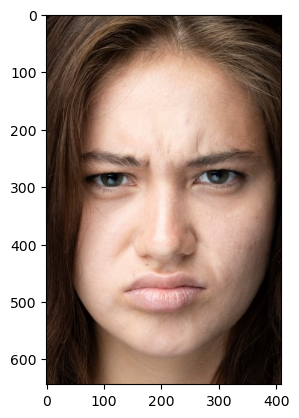

In [49]:
plt.imshow(image.load_img(img_path))
labels[np.argmax(preds)]